In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load your training dataset
train_data = pd.read_csv('train.csv')

# Check for missing values in the training dataset
print("Missing values in training dataset:")
print(train_data.isnull().sum())

# Drop rows with missing values
train_data = train_data.dropna()

train_reviews = train_data['text'].values
train_labels_str = train_data['sentiment'].values

# Convert string labels to numerical labels
train_labels = np.array(list(map({'neg': 0, 'pos': 1}.get, train_labels_str)))

# Load your testing dataset
test_data = pd.read_csv('test.csv')

# Check for missing values in the testing dataset
print("\nMissing values in testing dataset:")
print(test_data.isnull().sum())

# Drop rows with missing values
test_data = test_data.dropna()

test_reviews = test_data['text'].values
test_labels_str = test_data['sentiment'].values

# Convert string labels to numerical labels
test_labels = np.array(list(map({'neg': 0, 'pos': 1}.get, test_labels_str)))

# Tokenize and pad sequences
max_features = 10000
maxlen = 200

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_reviews)

x_train = tokenizer.texts_to_sequences(train_reviews)
x_test = tokenizer.texts_to_sequences(test_reviews)

# Check for None values in x_train and x_test
if any(None in sequence for sequence in x_train):
    print("Warning: x_train contains None values after tokenization.")
if any(None in sequence for sequence in x_test):
    print("Warning: x_test contains None values after tokenization.")

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build and compile the model
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, train_labels, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Missing values in training dataset:
text         0
sentiment    0
dtype: int64

Missing values in testing dataset:
text         0
sentiment    0
dtype: int64
Epoch 1/3
625/625 [==============================] - 29s 45ms/step - loss: 0.4094 - accuracy: 0.7958 - val_loss: 0.2883 - val_accuracy: 0.8776
Epoch 2/3
625/625 [==============================] - 28s 45ms/step - loss: 0.0676 - accuracy: 0.9781 - val_loss: 0.4002 - val_accuracy: 0.8548
Epoch 3/3
782/782 [==============================] - 5s 6ms/step - loss: 0.5909 - accuracy: 0.8472
Test accuracy: 84.72%


Epoch 1/3
625/625 [==============================] - 28s 45ms/step - loss: 4.6056e-05 - accuracy: 1.0000 - val_loss: 0.6217 - val_accuracy: 0.8686
Epoch 2/3
625/625 [==============================] - 30s 48ms/step - loss: 3.0983e-05 - accuracy: 1.0000 - val_loss: 0.6368 - val_accuracy: 0.8688
Epoch 3/3
625/625 [==============================] - 28s 44ms/step - loss: 2.1014e-05 - accuracy: 1.0000 - val_loss: 0.6516 - val_accuracy: 0.8684


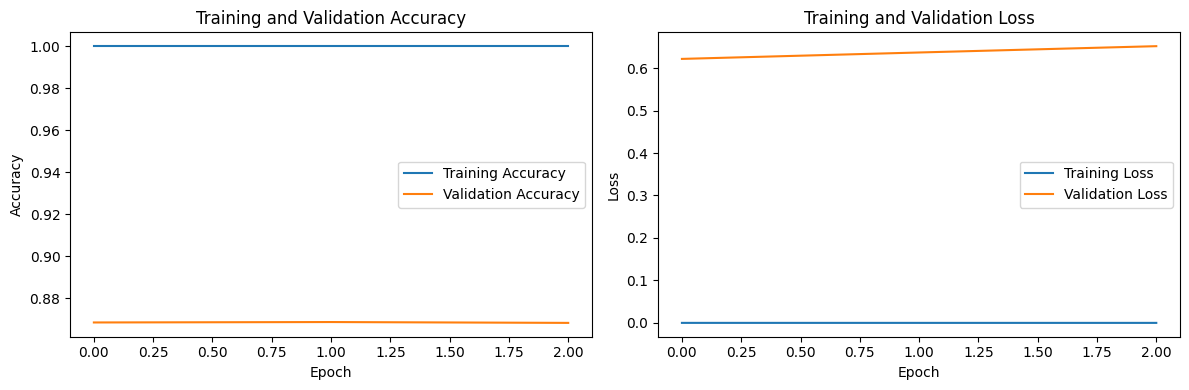

782/782 [==============================] - 5s 6ms/step - loss: 0.7014 - accuracy: 0.8567
Test accuracy: 85.67%


In [15]:
import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(x_train, train_labels, epochs=3, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')


782/782 [==============================] - 7s 8ms/step


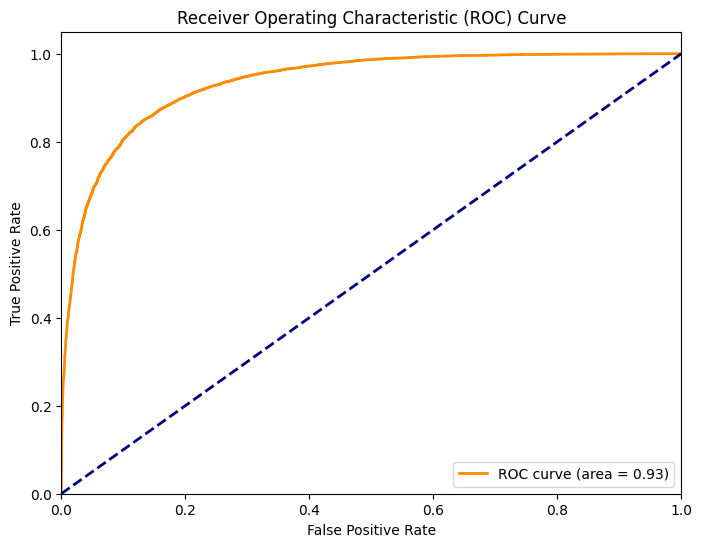

In [17]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = model.predict(x_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [18]:
pip install seaborn wordcloud


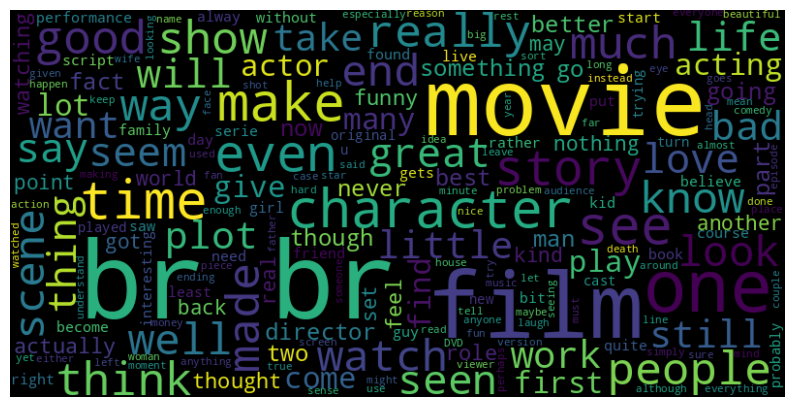

In [19]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(train_reviews)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_reviews)

# Plot the Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
